# Cell types annotation

## 1. Download libs

In [1]:
!pip install scanpy[leiden] celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1aa19a9b26a1ccecefb54d1a3cfa469c63afe9cf2755c1e0a361ed4f863c33d9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created whee

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from scipy.sparse import csr_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import celltypist
from celltypist import models

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Download data

In [4]:
# загружаем обработанные ранее данные
adata = sc.read_h5ad('/content/drive/MyDrive/itmo_bioinformatics_school_sc/adata_mouse.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 1736 × 15354
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_scores', 'predicted_doublets', 'leiden_0.5', 'leiden_0.75', 'leiden_1', 'leiden_1.25', 'leiden_1.5', 'leiden_1.75', 'leiden_2'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_0.5_colors', 'leiden_0.75_colors', 'leiden_1.25_colors', 'leiden_1.5_colors', 'leiden_1.75_colors', 'leiden_1_colors', 'leiden_2_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
# now let's run leiden clustering
# let's identify clusters at different resolutions so that we can choose between them during annotation step later

sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")
sc.tl.leiden(adata, resolution=0.75, key_added="leiden_0.75")
sc.tl.leiden(adata, resolution=1, key_added="leiden_1")
sc.tl.leiden(adata, resolution=1.25, key_added="leiden_1.25")
sc.tl.leiden(adata, resolution=1.5, key_added="leiden_1.5")
sc.tl.leiden(adata, resolution=1.75, key_added="leiden_1.75")
sc.tl.leiden(adata, resolution=2, key_added="leiden_2")


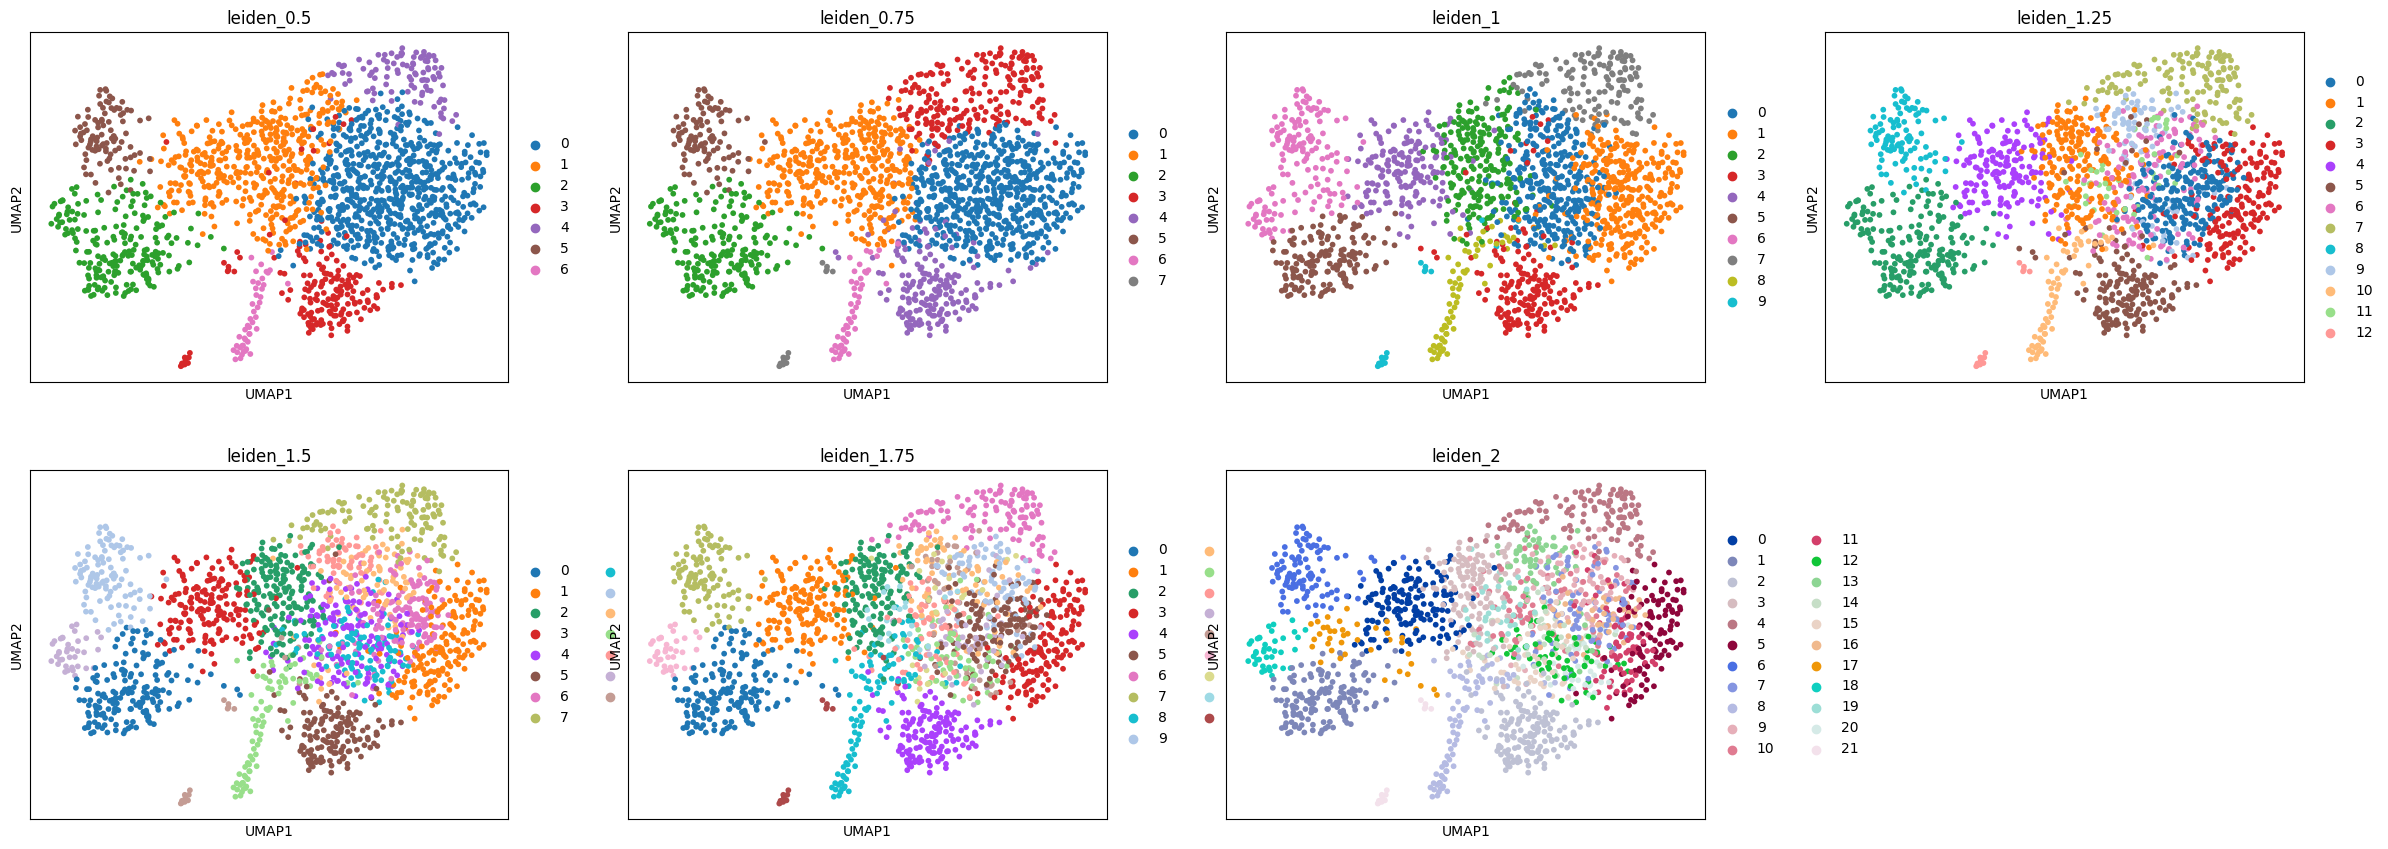

In [7]:
# in the following plot each dot represents a particular cell; color represents the cluster to which
# leiden algorithm assigned this particular cell

sc.pl.umap(adata, color=["leiden_0.5", "leiden_0.75", "leiden_1", "leiden_1.25", "leiden_1.5", "leiden_1.75", "leiden_2"])


In [8]:
adata.var

gene_ids     mt  n_cells_by_counts  mean_counts  \
Xkr4            ENSMUSG00000051951  False                 22     0.011458   
Sox17           ENSMUSG00000025902  False                 76     0.052083   
Mrpl15          ENSMUSG00000033845  False               1169     1.071354   
Lypla1          ENSMUSG00000025903  False                302     0.175521   
Tcea1           ENSMUSG00000033813  False                756     0.557813   
...                            ...    ...                ...          ...   
Tmlhe           ENSMUSG00000079834  False                  7     0.003646   
Ccl27a-2        ENSMUSG00000093828  False                  3     0.001563   
PISD            ENSMUSG00000095041  False               1154     1.083854   
DHRSX           ENSMUSG00000063897  False                457     0.295833   
CAAA01147332.1  ENSMUSG00000095742  False                 21     0.010937   

                log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4                     0.011393              98.854167          22.0   
Sox17                    0.050772              96.041667         100.0   
Mrpl15                   0.728203              39.114583        2057.0   
Lypla1                   0.161711              84.270833         337.0   
Tcea1                    0.443283              60.625000        1071.0   
...                           ...                    ...           ...   
Tmlhe                    0.003639              99.635417           7.0   
Ccl27a-2                 0.001561              99.843750           3.0   
PISD                     0.734219              39.895833        2081.0   
DHRSX                    0.259154              76.197917         568.0   
CAAA01147332.1           0.010878              98.906250          21.0   

                log1p_total_counts  n_cells  highly_variable     means  \
Xkr4                      3.135494       22            False  0.008891   
Sox17                     4.615120       76             True  0.033112   
Mrpl15                    7.629490     1169            False  0.643046   
Lypla1                    5.823046      302            False  0.121091   
Tcea1                     6.977282      756            False  0.364516   
...                            ...      ...              ...       ...   
Tmlhe                     2.079442        7            False  0.002884   
Ccl27a-2                  1.386294        3            False  0.001103   
PISD                      7.641084     1154             True  0.648832   
DHRSX                     6.343881      457            False  0.201445   
CAAA01147332.1            3.091043       21            False  0.007465   

                dispersions  dispersions_norm  
Xkr4               0.911811          0.672563  
Sox17              0.926887          1.993249  
Mrpl15             0.538854          0.332476  
Lypla1             0.795310         -0.554977  
Tcea1              0.693627         -0.413690  
...                     ...               ...  
Tmlhe              0.918510          0.557522  
Ccl27a-2           0.686359         -1.113089  
PISD               0.585803          1.085375  
DHRSX              0.780028          0.574058  
CAAA01147332.1     0.813006         -0.690191  

[15354 rows x 13 columns]

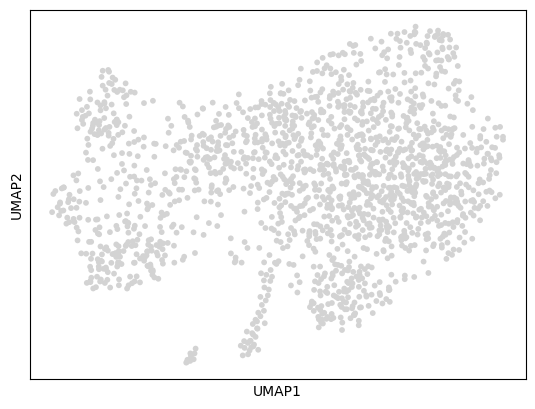

In [9]:
sc.pl.umap(adata) # without params we have only base

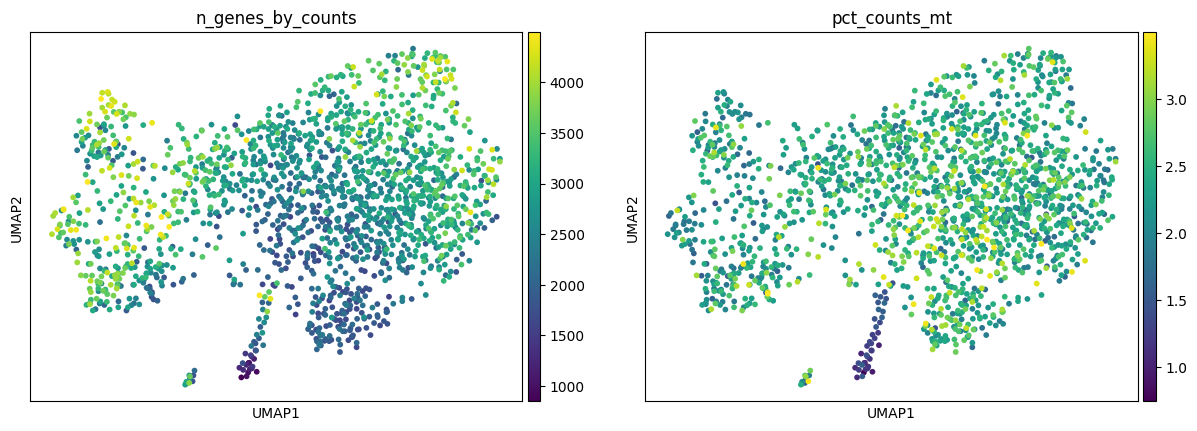

In [10]:
# now we can see some QC metrics
sc.pl.umap(adata, color=['n_genes_by_counts', 'pct_counts_mt'])

In [11]:
adata.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                 7.994970        8195.0   
AAACCTGCACAAGACG-1               4415                 8.392990       15941.0   
AAACCTGCATGGTCAT-1               3400                 8.131825        9812.0   
AAACCTGGTATTCGTG-1               2473                 7.813592        5973.0   
AAACCTGTCCCAGGTG-1               2523                 7.833600        6096.0   
...                               ...                      ...           ...   
TTTGTCAGTAGCTCCG-1               1827                 7.510978        3752.0   
TTTGTCAGTCATGCAT-1               3303                 8.102889        9495.0   
TTTGTCAGTCTTCTCG-1               1696                 7.436617        3311.0   
TTTGTCAGTTTACTCT-1               3003                 8.007700        8542.0   
TTTGTCATCTGGTGTA-1               3075                 8.031385        8811.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   
AAACCTGCATGGTCAT-1            9.191463                   10.069303   
AAACCTGGTATTCGTG-1            8.695172                   12.288632   
AAACCTGTCCCAGGTG-1            8.715552                   12.253937   
...                                ...                         ...   
TTTGTCAGTAGCTCCG-1            8.230310                   12.420043   
TTTGTCAGTCATGCAT-1            9.158626                   10.658241   
TTTGTCAGTCTTCTCG-1            8.105308                   12.956811   
TTTGTCAGTTTACTCT-1            9.052868                   12.479513   
TTTGTCATCTGGTGTA-1            9.083870                   11.701282   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   
AAACCTGCATGGTCAT-1            186.0               5.231109       1.895638   
AAACCTGGTATTCGTG-1            159.0               5.075174       2.661979   
AAACCTGTCCCAGGTG-1            116.0               4.762174       1.902887   
...                             ...                    ...            ...   
TTTGTCAGTAGCTCCG-1             76.0               4.343805       2.025586   
TTTGTCAGTCATGCAT-1            192.0               5.262690       2.022117   
TTTGTCAGTCTTCTCG-1             63.0               4.158883       1.902748   
TTTGTCAGTTTACTCT-1            228.0               5.433722       2.669164   
TTTGTCATCTGGTGTA-1            175.0               5.170484       1.986154   

                    n_genes  doublet_scores  predicted_doublets leiden_0.5  \
AAACCTGAGTACGCCC-1     2965        0.057953               False          1   
AAACCTGCACAAGACG-1     4415        0.062374               False          2   
AAACCTGCATGGTCAT-1     3400        0.050342               False          2   
AAACCTGGTATTCGTG-1     2473        0.114716               False          0   
AAACCTGTCCCAGGTG-1     2523        0.086124               False          0   
...                     ...             ...                 ...        ...   
TTTGTCAGTAGCTCCG-1     1827        0.030193               False          0   
TTTGTCAGTCATGCAT-1     3303        0.036327               False          2   
TTTGTCAGTCTTCTCG-1     1696        0.030193               False          3   
TTTGTCAGTTTACTCT-1     3003        0.062374               False          1   
TTTGTCATCTGGTGTA-1     3075        0.103669               False          0   

                   leiden_0.75 leiden_1 leiden_1.25 leiden_1.5 leiden_1.75  \
AAACCTGAGTACGCCC-1           1        2           1          2           2   
AAACCTGCACAAGACG-1           2        6           2         13          15   
AAACCTGCATGGTCAT-1           2        6           2         13          15   
AAACCTGGTATTCGTG-1           0        7     

## 3. ML-based annotation

Celltypist требует на вход 1e4 нормализованные и log1p трансформированные данные. Проверить это нужно заранее

In [12]:
adata.X.expm1().sum(axis = 1)
# adata.layers["normlog"].expm1().sum(axis = 1)

matrix([[10000.049],
        [ 9999.992],
        [ 9999.911],
        ...,
        [ 9999.969],
        [10000.165],
        [ 9999.821]], dtype=float32)

In [13]:
# download all the models and select the ones we need
models.download_models(force_update = True)

In [14]:
# we have mouse brain (cells from a combined cortex, hippocampus and sub ventricular zone of an E18 mouse)
models.models_description()

model  \
0                        Immune_All_Low.pkl   
1                       Immune_All_High.pkl   
2   Adult_CynomolgusMacaque_Hippocampus.pkl   
3           Adult_Human_PancreaticIslet.pkl   
4                      Adult_Human_Skin.pkl   
5                       Adult_Mouse_Gut.pkl   
6             Adult_Mouse_OlfactoryBulb.pkl   
7                 Adult_Pig_Hippocampus.pkl   
8       Adult_RhesusMacaque_Hippocampus.pkl   
9                  Autopsy_COVID19_Lung.pkl   
10         COVID19_HumanChallenge_Blood.pkl   
11             COVID19_Immune_Landscape.pkl   
12                     Cells_Fetal_Lung.pkl   
13               Cells_Intestinal_Tract.pkl   
14                    Cells_Lung_Airway.pkl   
15               Developing_Human_Brain.pkl   
16              Developing_Human_Gonads.pkl   
17         Developing_Human_Hippocampus.pkl   
18              Developing_Human_Organs.pkl   
19              Developing_Human_Thymus.pkl   
20               Developing_Mouse_Brain.pkl   
21         Developing_Mouse_Hippocampus.pkl   
22            Fetal_Human_AdrenalGlands.pkl   
23                 Fetal_Human_Pancreas.pkl   
24                Fetal_Human_Pituitary.pkl   
25                   Fetal_Human_Retina.pkl   
26                     Fetal_Human_Skin.pkl   
27                  Healthy_Adult_Heart.pkl   
28                 Healthy_COVID19_PBMC.pkl   
29                  Healthy_Human_Liver.pkl   
30                  Healthy_Mouse_Liver.pkl   
31          Human_AdultAged_Hippocampus.pkl   
32           Human_Developmental_Retina.pkl   
33              Human_Embryonic_YolkSac.pkl   
34                       Human_IPF_Lung.pkl   
35       Human_Longitudinal_Hippocampus.pkl   
36                     Human_Lung_Atlas.pkl   
37                        Human_PF_Lung.pkl   
38                  Lethal_COVID19_Lung.pkl   
39                  Mouse_Dentate_Gyrus.pkl   
40          Mouse_Isocortex_Hippocampus.pkl   
41         Mouse_Postnatal_DentateGyrus.pkl   
42                   Nuclei_Lung_Airway.pkl   
43                      Pan_Fetal_Human.pkl   

                                          description  
0   immune sub-populations combined from 20 tissue...  
1   immune populations combined from 20 tissues of...  
2   cell types from the hippocampus of adult cynom...  
3   cell types from pancreatic islets of healthy a...  
4            cell types from human healthy adult skin  
5   cell types in the adult mouse gut combined fro...  
6    cell types from the olfactory bulb of adult mice  
7           cell types from the adult pig hippocampus  
8   cell types from the hippocampus of adult rhesu...  
9   cell types from the lungs of 16 SARS-CoV-2 inf...  
10  detailed blood cell states from 16 individuals...  
11  immune subtypes from lung and blood of COVID-1...  
12    cell types from human embryonic and fetal lungs  
13  intestinal cells from fetal, pediatric (health...  
14  cell populations from scRNA-seq of five locati...  
15  cell types from the first-trimester developing...  
16  cell types of human gonadal and adjacent extra...  
17   cell types from the developing human hippocampus  
18  cell types of five endoderm-derived organs in ...  
19  cell populations in embryonic, fetal, pediatri...  
20  cell types from the embryonic mouse brain betw...  
21  cell types from the mouse hippocampus at postn...  
22  cell types of human fetal adrenal glands from ...  
23  pancreatic cell types from human embryos at 9-...  
24  cell types of human fetal pituitaries from 7 t...  
25  cell types from human fetal neural retina and ...  
26        cell types from developing human fetal skin  
27  cell types from eight anatomical regions of th...  
28  peripheral blood mononuclear cell types from h...  
29  cell types from scRNA-seq and snRNA-seq of the...  
30  cell types from scRNA-seq and snRNA-seq of the...  
31  cell types from the hippocampus of adult and a...  
32                 cell types from human fetal retina  
33  cell types of 

### Dental Gyrus

In [31]:
adata_celltypist_dg = adata.copy()

In [32]:
dg = models.Model.load(model = 'Mouse_Dentate_Gyrus.pkl')

In [33]:
dg.cell_types

array(['Astro-adult', 'Astro-juv', 'CA3-Pyr', 'Cajal-Retzius',
       'Endothelial', 'Ependymal', 'GABA', 'GC-adult', 'GC-juv',
       'Immature-Astro', 'Immature-GABA', 'Immature-GC', 'Immature-Pyr',
       'MOL', 'MiCajal-Retziusoglia', 'NFOL', 'Neuroblast', 'OPC', 'PVM',
       'RGL', 'RGL_young', 'VLMC', 'nIPC', 'nIPC-perin'], dtype=object)

In [34]:
len(dg.cell_types)

24

In [35]:
predictions_dg = celltypist.annotate(adata_celltypist_dg, model = 'Mouse_Dentate_Gyrus.pkl', majority_voting = True)

In [23]:
predictions_dg.predicted_labels.head()

predicted_labels over_clustering majority_voting
AAACCTGAGTACGCCC-1     Immature-Pyr              15    Immature-Pyr
AAACCTGCACAAGACG-1       nIPC-perin               9      nIPC-perin
AAACCTGCATGGTCAT-1       nIPC-perin               9      nIPC-perin
AAACCTGGTATTCGTG-1     Immature-Pyr              27    Immature-Pyr
AAACCTGTCCCAGGTG-1     Immature-Pyr              25    Immature-Pyr

In [36]:
adata_celltypist_dg_resolution = predictions_dg.to_adata()
adata_celltypist_dg_resolution.obs.head(2)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                  7.99497        8195.0   
AAACCTGCACAAGACG-1               4415                  8.39299       15941.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   

                    n_genes  doublet_scores  ...  leiden_0.75 leiden_1  \
AAACCTGAGTACGCCC-1     2965        0.057953  ...            1        2   
AAACCTGCACAAGACG-1     4415        0.062374  ...            2        6   

                   leiden_1.25 leiden_1.5 leiden_1.75 leiden_2  \
AAACCTGAGTACGCCC-1           1          2           2        3   
AAACCTGCACAAGACG-1           2         13          15       18   

                   predicted_labels over_clustering majority_voting conf_score  
AAACCTGAGTACGCCC-1     Immature-Pyr              15    Immature-Pyr   0.005683  
AAACCTGCACAAGACG-1       nIPC-perin               9      nIPC-perin   0.295602  

[2 rows x 22 columns]

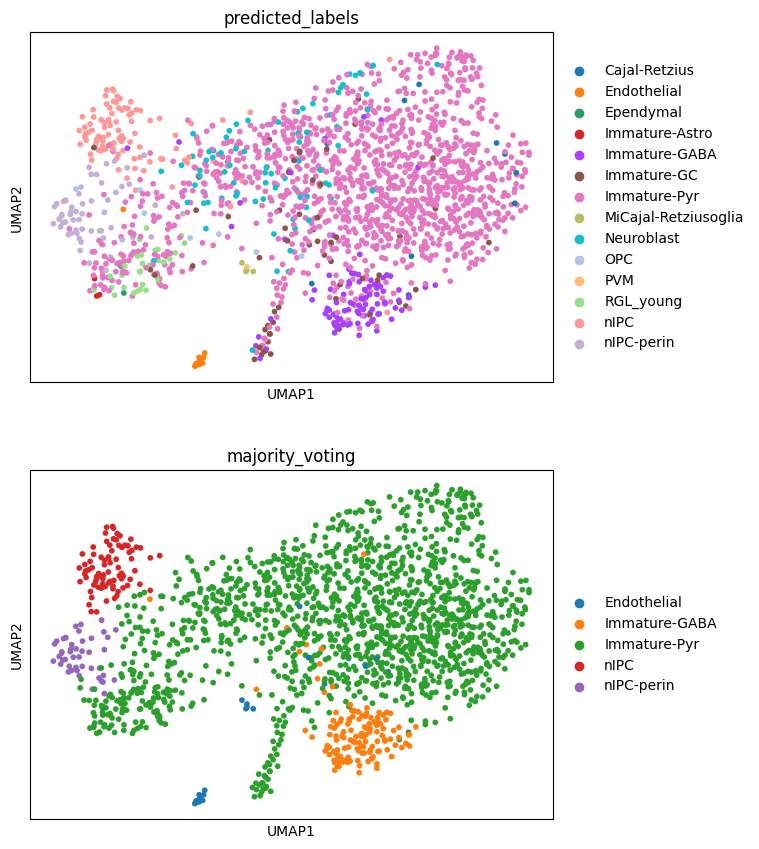

In [37]:
sc.pl.umap(adata_celltypist_dg_resolution, color=['predicted_labels', 'majority_voting'], ncols=1)

### Postnatal Dental Gyrus

In [38]:
adata_celltypist_dg_postnatal = adata.copy()

In [39]:
dg_postnatal = models.Model.load(model = 'Mouse_Postnatal_DentateGyrus.pkl')

In [40]:
dg_postnatal.cell_types

array(['Astrocytes', 'Cajal-Retzius', 'Cck-Tox', 'Endothelial',
       'GABA-Cnr1', 'GABA-Lhx6', 'Granule-immature', 'Granule-mature',
       'Microglia', 'Mossy-Adcyap1', 'Mossy-Cyp26b1', 'Mossy-Klk8',
       'NFOL', 'Neuroblast_1', 'Neuroblast_2', 'OL', 'OPC', 'PVM',
       'Pericytes', 'Radial_Glia-like', 'VLMC', 'nIPC'], dtype=object)

In [41]:
len(dg_postnatal.cell_types)

22

In [42]:
predictions_dg_postnatal = celltypist.annotate(adata_celltypist_dg_postnatal, model = 'Mouse_Postnatal_DentateGyrus.pkl', majority_voting = True)

In [43]:
predictions_dg_postnatal.predicted_labels.head()

predicted_labels over_clustering majority_voting
AAACCTGAGTACGCCC-1     Neuroblast_1              15    Neuroblast_1
AAACCTGCACAAGACG-1             nIPC               9            nIPC
AAACCTGCATGGTCAT-1             nIPC               9            nIPC
AAACCTGGTATTCGTG-1             nIPC              27            nIPC
AAACCTGTCCCAGGTG-1      Endothelial              25    Neuroblast_2

In [44]:
adata_celltypist_dg_postnatal_resolution = predictions_dg_postnatal.to_adata()
adata_celltypist_dg_postnatal_resolution.obs.head(2)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                  7.99497        8195.0   
AAACCTGCACAAGACG-1               4415                  8.39299       15941.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   

                    n_genes  doublet_scores  ...  leiden_0.75 leiden_1  \
AAACCTGAGTACGCCC-1     2965        0.057953  ...            1        2   
AAACCTGCACAAGACG-1     4415        0.062374  ...            2        6   

                   leiden_1.25 leiden_1.5 leiden_1.75 leiden_2  \
AAACCTGAGTACGCCC-1           1          2           2        3   
AAACCTGCACAAGACG-1           2         13          15       18   

                   predicted_labels over_clustering majority_voting conf_score  
AAACCTGAGTACGCCC-1     Neuroblast_1              15    Neuroblast_1   0.235650  
AAACCTGCACAAGACG-1             nIPC               9            nIPC   0.995493  

[2 rows x 22 columns]

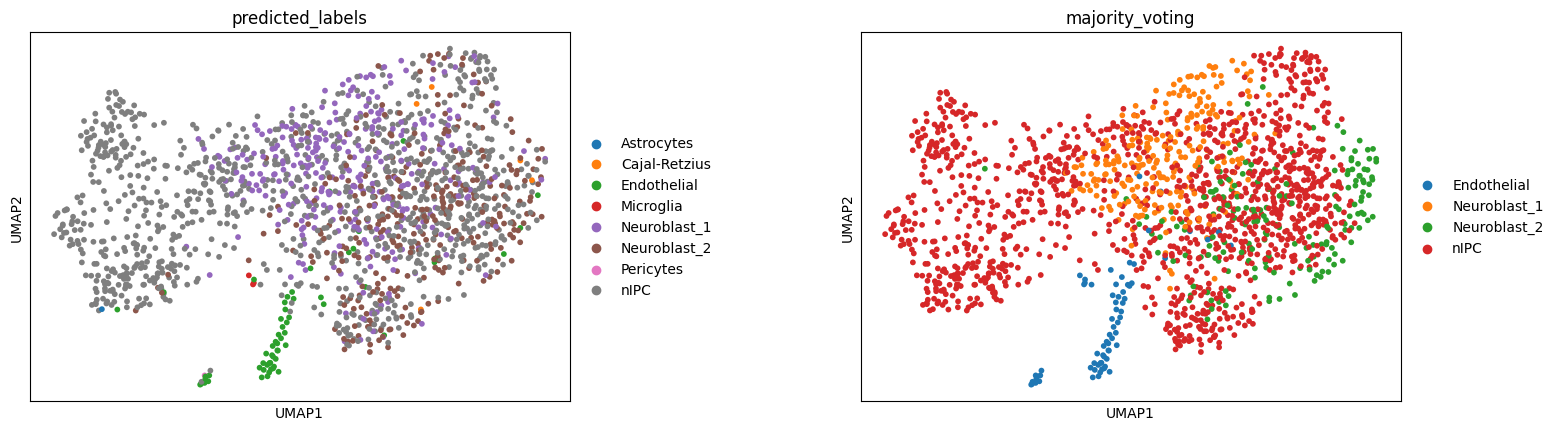

In [45]:
sc.pl.umap(adata_celltypist_dg_postnatal_resolution, color=['predicted_labels', 'majority_voting'], wspace=0.4)

### Isocortex Hippocampus

In [46]:
adata_celltypist_isocortex_hippo = adata.copy()

In [47]:
isocortex_hippo = models.Model.load(model = 'Mouse_Isocortex_Hippocampus.pkl')

In [48]:
isocortex_hippo.cell_types

array(['Astro', 'CA1-ProS', 'CA2-IG-FC', 'CA3', 'CR', 'CT SUB', 'Car3',
       'DG', 'Endo', 'L2 IT ENTl', 'L2 IT ENTm', 'L2/3 IT CTX',
       'L2/3 IT ENTl', 'L2/3 IT PPP', 'L2/3 IT RHP', 'L3 IT ENT',
       'L4 RSP-ACA', 'L4/5 IT CTX', 'L5 IT CTX', 'L5 PPP', 'L5 PT CTX',
       'L5/6 IT TPE-ENT', 'L5/6 NP CTX', 'L6 CT CTX', 'L6 IT CTX',
       'L6 IT ENTl', 'L6b CTX', 'L6b/CT ENT', 'Lamp5', 'Meis2',
       'Micro-PVM', 'NP PPP', 'NP SUB', 'Oligo', 'Pvalb', 'SMC-Peri',
       'SUB-ProS', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip'],
      dtype=object)

In [49]:
len(isocortex_hippo.cell_types)

42

In [50]:
predictions_isocortex_hippo = celltypist.annotate(adata_celltypist_isocortex_hippo, model = 'Mouse_Isocortex_Hippocampus.pkl', majority_voting = True)

In [51]:
predictions_isocortex_hippo.predicted_labels.head()

predicted_labels over_clustering majority_voting
AAACCTGAGTACGCCC-1            Astro              15           Astro
AAACCTGCACAAGACG-1            Astro               9           Astro
AAACCTGCATGGTCAT-1            Astro               9           Astro
AAACCTGGTATTCGTG-1            Astro              27           Astro
AAACCTGTCCCAGGTG-1        Micro-PVM              25           Astro

In [52]:
adata_celltypist_isocortex_hippo_resolution = predictions_isocortex_hippo.to_adata()
adata_celltypist_isocortex_hippo_resolution.obs.head(2)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                  7.99497        8195.0   
AAACCTGCACAAGACG-1               4415                  8.39299       15941.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   

                    n_genes  doublet_scores  ...  leiden_0.75 leiden_1  \
AAACCTGAGTACGCCC-1     2965        0.057953  ...            1        2   
AAACCTGCACAAGACG-1     4415        0.062374  ...            2        6   

                   leiden_1.25 leiden_1.5 leiden_1.75 leiden_2  \
AAACCTGAGTACGCCC-1           1          2           2        3   
AAACCTGCACAAGACG-1           2         13          15       18   

                   predicted_labels over_clustering majority_voting conf_score  
AAACCTGAGTACGCCC-1            Astro              15           Astro   0.964121  
AAACCTGCACAAGACG-1            Astro               9           Astro   0.899345  

[2 rows x 22 columns]

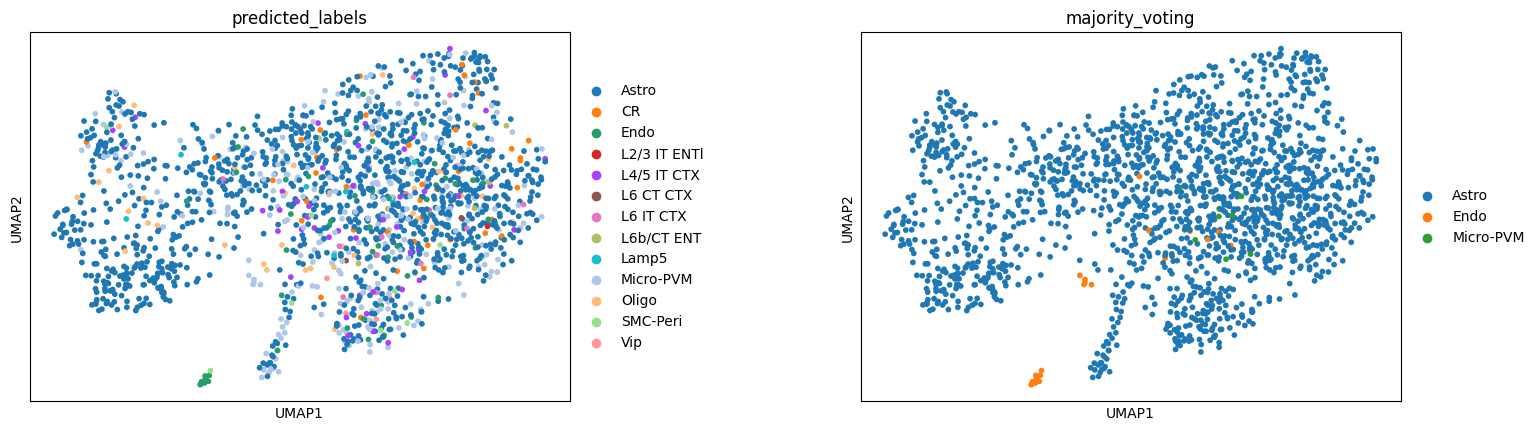

In [53]:
sc.pl.umap(adata_celltypist_isocortex_hippo_resolution, color=['predicted_labels', 'majority_voting'], wspace=0.4)

### Developing Brain

In [54]:
adata_celltypist_dev_brain = adata.copy()

In [55]:
dev_brain = models.Model.load(model = 'Developing_Mouse_Brain.pkl')

In [56]:
dev_brain.cell_types

array(['Bad cells: Undefined', 'Blood: Erythrocyte',
       'Blood: Erythroid progenitor', 'Blood: Platelet',
       'Blood: Undefined', 'Choroid plexus: Choroid plexus',
       'Ectoderm: Adenohypophyseal placode',
       'Ectoderm: Dorsal early ectoderm', 'Ectoderm: Early ectoderm',
       'Ectoderm: Lateral nasal pit', 'Ectoderm: Lens',
       'Ectoderm: Olfactory epithelium', 'Ectoderm: Olfactory pit',
       'Ectoderm: Oral ectoderm', 'Ectoderm: Otic vesicle',
       'Ectoderm: Pharyngeal epithelium', 'Ectoderm: Surface ectoderm',
       'Ectoderm: Undefined', 'Endoderm: Gut', 'Ependymal: Forebrain',
       'Ependymal: Mixed region', 'Ependymal: Undefined',
       'Fibroblast: Arachnoid', 'Fibroblast: Arachnoid barrier cells',
       'Fibroblast: Chondrocytes', 'Fibroblast: Dura',
       'Fibroblast: Early fibroblasts',
       'Fibroblast: Intermediate meninges 1',
       'Fibroblast: Intermediate meninges 2',
       'Fibroblast: Perivascular fibroblast-like cells',
       'Fibrob

In [57]:
 len(dev_brain.cell_types)

174

In [58]:
predictions_dev_brain = celltypist.annotate(adata_celltypist_dev_brain, model = 'Developing_Mouse_Brain.pkl', majority_voting = True)

In [59]:
predictions_dev_brain.predicted_labels.head()

predicted_labels  \
AAACCTGAGTACGCCC-1                               Blood: Undefined   
AAACCTGCACAAGACG-1                           Glioblast: Forebrain   
AAACCTGCATGGTCAT-1                               Blood: Undefined   
AAACCTGGTATTCGTG-1  Neuron: Cortical or hippocampal glutamatergic   
AAACCTGTCCCAGGTG-1                               Blood: Undefined   

                   over_clustering   majority_voting  
AAACCTGAGTACGCCC-1              15  Blood: Undefined  
AAACCTGCACAAGACG-1               9  Blood: Undefined  
AAACCTGCATGGTCAT-1               9  Blood: Undefined  
AAACCTGGTATTCGTG-1              27  Blood: Undefined  
AAACCTGTCCCAGGTG-1              25  Blood: Undefined

In [60]:
adata_celltypist_dev_brain_resolution = predictions_dev_brain.to_adata()
adata_celltypist_dev_brain_resolution.obs.head(2)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                  7.99497        8195.0   
AAACCTGCACAAGACG-1               4415                  8.39299       15941.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   

                    n_genes  doublet_scores  ...  leiden_0.75 leiden_1  \
AAACCTGAGTACGCCC-1     2965        0.057953  ...            1        2   
AAACCTGCACAAGACG-1     4415        0.062374  ...            2        6   

                   leiden_1.25 leiden_1.5 leiden_1.75 leiden_2  \
AAACCTGAGTACGCCC-1           1          2           2        3   
AAACCTGCACAAGACG-1           2         13          15       18   

                        predicted_labels over_clustering   majority_voting  \
AAACCTGAGTACGCCC-1      Blood: Undefined              15  Blood: Undefined   
AAACCTGCACAAGACG-1  Glioblast: Forebrain               9  Blood: Undefined   

                   conf_score  
AAACCTGAGTACGCCC-1   0.817264  
AAACCTGCACAAGACG-1   0.868459  

[2 rows x 22 columns]

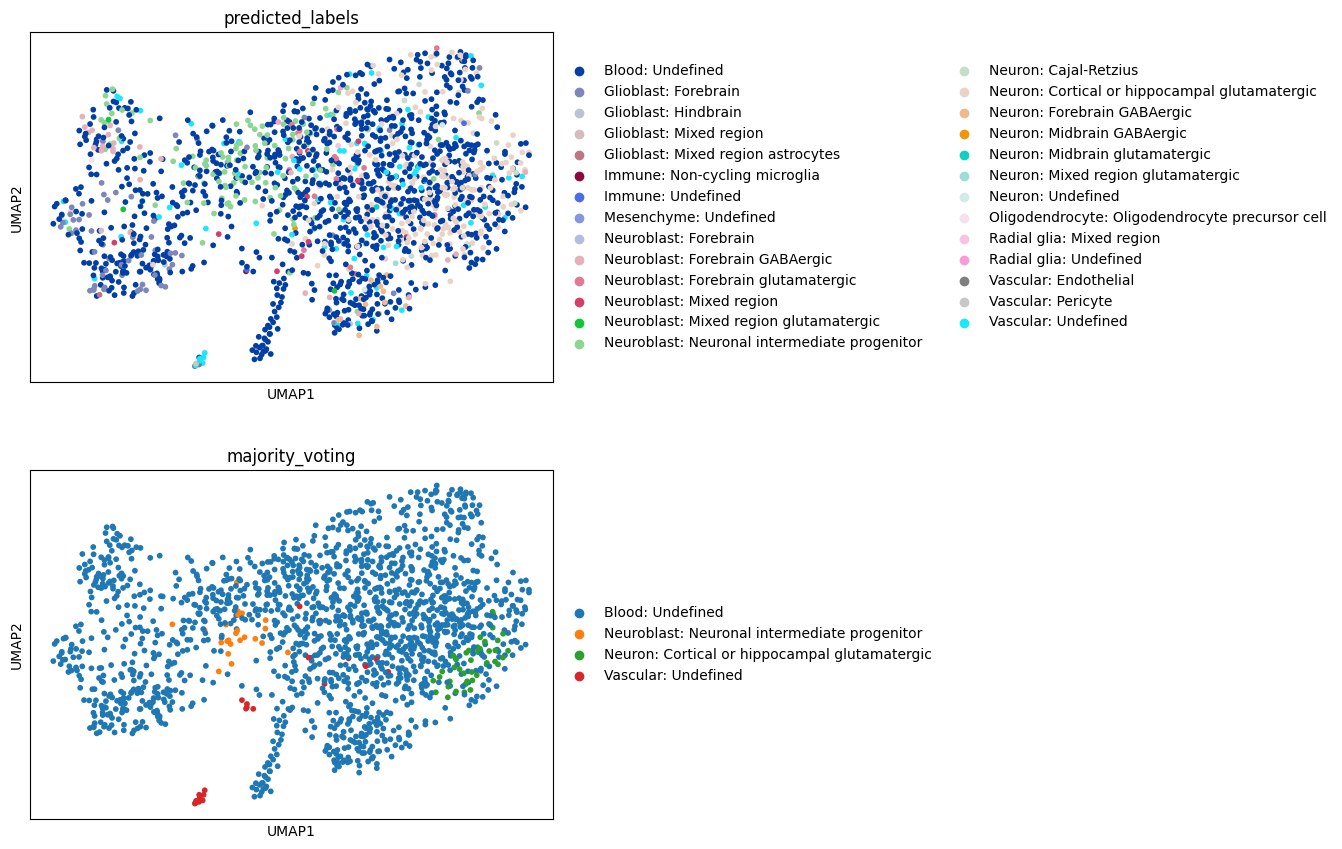

In [62]:
sc.pl.umap(adata_celltypist_dev_brain_resolution, color=['predicted_labels', 'majority_voting'], ncols=1)

### Developing Hippocampus

In [63]:
adata_celltypist_dev_hippo = adata.copy()

In [64]:
dev_hippo = models.Model.load(model = 'Developing_Mouse_Hippocampus.pkl')

In [65]:
dev_hippo.cell_types

array(['Astro', 'ChorPlex', 'Ependymal', 'ExciteNeuron', 'GranuleNB',
       'InhibNeuron', 'Myeloid', 'NIPCs', 'Oligo', 'RGL', 'Vasc'],
      dtype=object)

In [66]:
len(dev_hippo.cell_types)

11

In [67]:
predictions_dev_hippo = celltypist.annotate(adata_celltypist_dev_hippo, model = 'Developing_Mouse_Hippocampus.pkl', majority_voting = True)

In [68]:
predictions_dev_hippo.predicted_labels.head()

predicted_labels over_clustering majority_voting
AAACCTGAGTACGCCC-1        GranuleNB              15       GranuleNB
AAACCTGCACAAGACG-1            NIPCs               9           NIPCs
AAACCTGCATGGTCAT-1            NIPCs               9           NIPCs
AAACCTGGTATTCGTG-1        GranuleNB              27       GranuleNB
AAACCTGTCCCAGGTG-1            NIPCs              25       GranuleNB

In [69]:
adata_celltypist_dev_hippo_resolution = predictions_dev_hippo.to_adata()
adata_celltypist_dev_hippo_resolution.obs.head(2)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                  7.99497        8195.0   
AAACCTGCACAAGACG-1               4415                  8.39299       15941.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   

                    n_genes  doublet_scores  ...  leiden_0.75 leiden_1  \
AAACCTGAGTACGCCC-1     2965        0.057953  ...            1        2   
AAACCTGCACAAGACG-1     4415        0.062374  ...            2        6   

                   leiden_1.25 leiden_1.5 leiden_1.75 leiden_2  \
AAACCTGAGTACGCCC-1           1          2           2        3   
AAACCTGCACAAGACG-1           2         13          15       18   

                   predicted_labels over_clustering majority_voting conf_score  
AAACCTGAGTACGCCC-1        GranuleNB              15       GranuleNB   0.044047  
AAACCTGCACAAGACG-1            NIPCs               9           NIPCs   0.646443  

[2 rows x 22 columns]

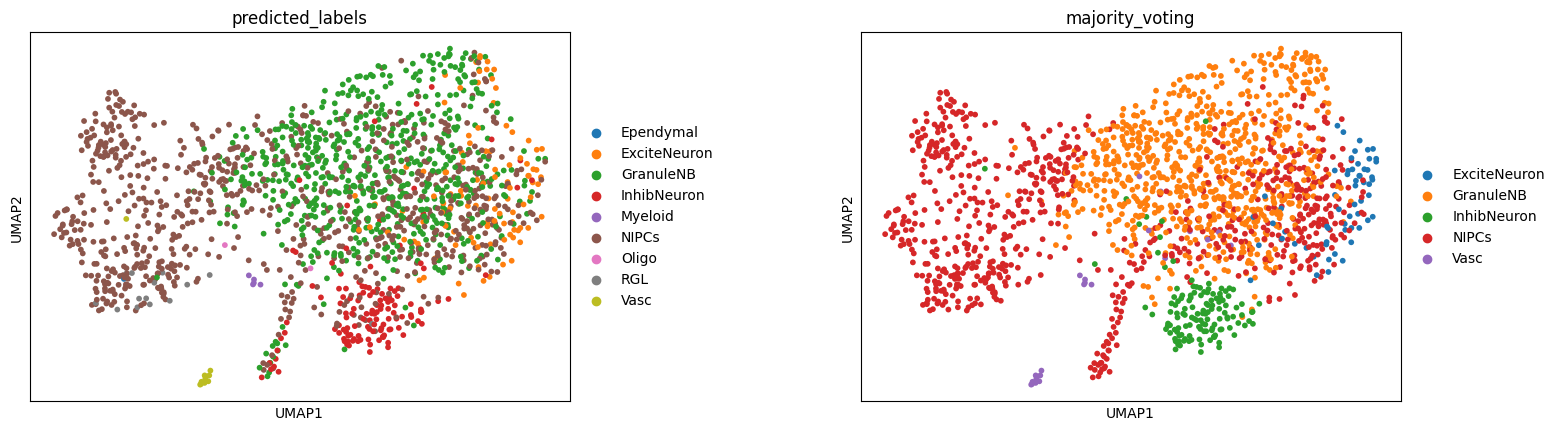

In [70]:
sc.pl.umap(adata_celltypist_dev_hippo_resolution, color=['predicted_labels', 'majority_voting'], wspace=0.4)

### Olfactory Bulb

In [71]:
adata_celltypist_olfactory_bulb = adata.copy()

In [72]:
olfactory_bulb = models.Model.load(model = 'Adult_Mouse_OlfactoryBulb.pkl')

In [73]:
olfactory_bulb.cell_types

array(['Astro1', 'Astro2', 'Astro3', 'EC1', 'EC2', 'Mes1', 'Mes2',
       'MicroG1', 'MicroG2', 'MicroG3', 'Mono', 'Mural1', 'Mural2',
       'MyOligo', 'Mφ', 'OEC1', 'OEC2', 'OEC3', 'OEC4', 'OEC5', 'OPC',
       'RBCs', 'n01-OSNs', 'n02-PGC-1', 'n03-GC-1', 'n04-Immature',
       'n05-PGC-2', 'n06-Transition', 'n07-GC-2', 'n08-PGC-3', 'n09-GC-3',
       'n10-GC-4', 'n11-GC-5', 'n12-GC-6', 'n13-AstrocyteLike',
       'n14-GC-7', 'n15-M/TC-1', 'n16-M/TC-2', 'n17-M/TC-3', 'n18-EPL-IN'],
      dtype=object)

In [74]:
len(olfactory_bulb.cell_types)

40

In [75]:
predictions_olfactory_bulb = celltypist.annotate(adata_celltypist_olfactory_bulb, model = 'Adult_Mouse_OlfactoryBulb.pkl', majority_voting = True)


In [76]:
predictions_olfactory_bulb.predicted_labels.head()

predicted_labels over_clustering majority_voting
AAACCTGAGTACGCCC-1     n04-Immature              15    n04-Immature
AAACCTGCACAAGACG-1     n04-Immature               9    n04-Immature
AAACCTGCATGGTCAT-1     n04-Immature               9    n04-Immature
AAACCTGGTATTCGTG-1     n04-Immature              27    n04-Immature
AAACCTGTCCCAGGTG-1     n04-Immature              25    n04-Immature

In [79]:
adata_celltypist_olfactory_bulb_resolution = predictions_olfactory_bulb.to_adata()
adata_celltypist_olfactory_bulb_resolution.obs.head(2)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCTGAGTACGCCC-1               2965                  7.99497        8195.0   
AAACCTGCACAAGACG-1               4415                  8.39299       15941.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCTGAGTACGCCC-1            9.011401                   12.336791   
AAACCTGCACAAGACG-1            9.676712                   10.212659   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCTGAGTACGCCC-1            222.0               5.407172       2.708969   
AAACCTGCACAAGACG-1            337.0               5.823046       2.114046   

                    n_genes  doublet_scores  ...  leiden_0.75 leiden_1  \
AAACCTGAGTACGCCC-1     2965        0.057953  ...            1        2   
AAACCTGCACAAGACG-1     4415        0.062374  ...            2        6   

                   leiden_1.25 leiden_1.5 leiden_1.75 leiden_2  \
AAACCTGAGTACGCCC-1           1          2           2        3   
AAACCTGCACAAGACG-1           2         13          15       18   

                   predicted_labels over_clustering majority_voting conf_score  
AAACCTGAGTACGCCC-1     n04-Immature              15    n04-Immature   0.999966  
AAACCTGCACAAGACG-1     n04-Immature               9    n04-Immature   0.999996  

[2 rows x 22 columns]

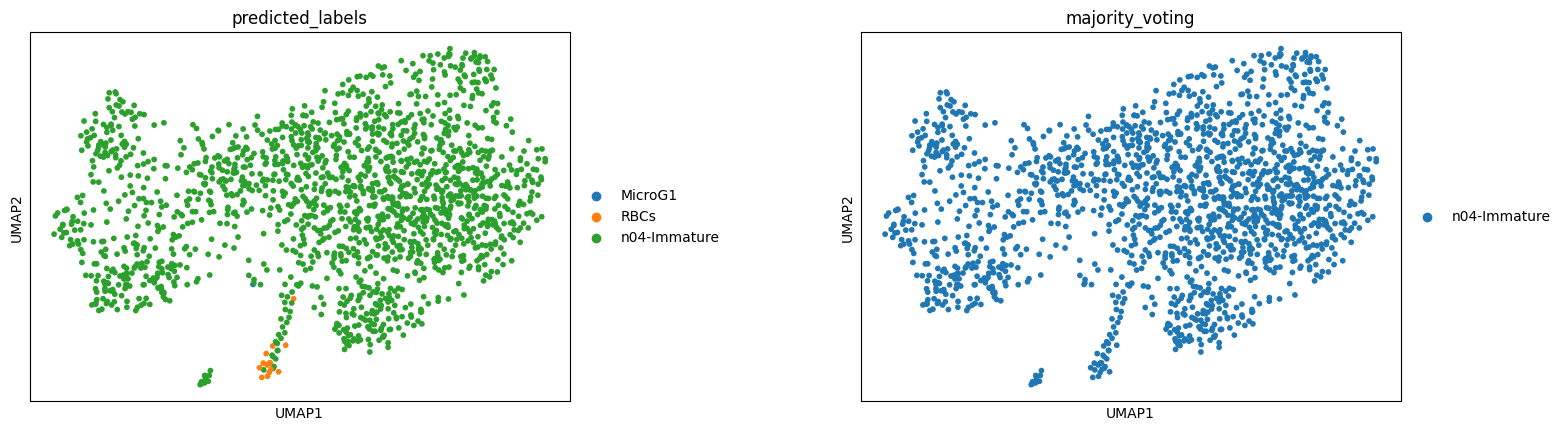

In [80]:
sc.pl.umap(adata_celltypist_olfactory_bulb_resolution, color=['predicted_labels', 'majority_voting'], wspace=0.4)